In [1]:
import pandas as pd
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_json("./data/ny_train.json")

In [3]:
df_test = pd.read_json('./data/ny_test.json')

In [4]:
df_test

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124003,1.0,1,bd863d28a6b119ac3bc72d5f27b07f24,2016-04-26 16:09:55,BRAND NEW TO MARKET 1BDR \r107TH AND LEXINGTON...,150 EAST 107TH STREET,[],40.7925,6928108,-73.9454,453d46f8113e1f2c730c2ee5a4469c71,[https://photos.renthop.com/2/6928108_231eb983...,1700,158 EAST 107TH STREET
124005,1.0,2,9174b75c0cd978eb0e5aa93afbad754b,2016-04-21 05:06:19,Convertible 2BR apartment features a brand new...,E 33rd St.,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7456,6906674,-73.9797,2983e45f7e0ad87d677dacd13e362785,[https://photos.renthop.com/2/6906674_9fe899a8...,4195,141 E 33rd St.
124006,1.0,0,0,2016-04-20 01:31:52,"Let's get you in to see this $2,400/mo, recent...",Lexington Avenue,"[Dogs Allowed, Cats Allowed]",40.7416,6897967,-73.9829,e6472c7237327dd3903b3d6f6a94515a,[],2400,95 Lexington Avenue
124007,2.0,2,c90c010e5505365676538e64d02aa1e0,2016-04-08 02:26:45,CooperCooper.com :: Web ID #171357; Access 100...,Park Avenue,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]",40.7485,6842183,-73.9800,6e5c10246156ae5bdcd9b487ca99d96a,[https://photos.renthop.com/2/6842183_b1fe51f4...,6895,41 Park Avenue


In [5]:
df.loc[df["interest_level"] == "low", "interest_level"] = 0
df.loc[df["interest_level"] == "medium", "interest_level"] = 1
df.loc[df["interest_level"] == "high", "interest_level"] = 2

In [6]:
df['created'] = pd.to_datetime(df['created'])

df['year'] = df['created'].dt.year

df['month'] = df['created'].dt.month

df['day'] = df['created'].dt.day

df['week'] = df['created'].dt.week

df['hour'] = df['created'].dt.hour

df['weekday'] = df['created'].dt.weekday

In [7]:
df['num_photos'] = df['photos'].apply(len)

df['num_features'] = df['features'].apply(len)

In [8]:
df['building_id'].value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
92b91722ec97bbcd5dc95ddaa31e919f       1
c1e51ac29122bff3cfc7ab11fc0b5cb4       1
feca20f2a223f58851cbc297bf1fbe6b       1
e976e853f1530a52c4d406bce11e5f98       1
d04bcaef422f0a6137f4849b80035408       1
Name: building_id, Length: 7585, dtype: int64

In [9]:
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,street_address,interest_level,year,month,day,week,hour,weekday,num_photos,num_features
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,145 Borinquen Place,1,2016,6,16,24,5,3,12,7
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,230 East 44th,0,2016,6,1,22,5,2,6,6
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,405 East 56th Street,1,2016,6,14,24,15,1,6,6
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,792 Metropolitan Avenue,1,2016,6,24,25,7,4,5,0
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,340 East 34th Street,0,2016,6,28,26,3,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,...,620 W 171 Street,0,2016,4,5,14,3,1,5,3
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,...,3333 Broadway,1,2016,4,2,13,2,5,5,7
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,...,210 Brighton 15th St,1,2016,4,26,17,5,1,3,11
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,...,350 West 21st Street,1,2016,4,19,16,2,1,5,5


In [10]:
df['building_id'].value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
92b91722ec97bbcd5dc95ddaa31e919f       1
c1e51ac29122bff3cfc7ab11fc0b5cb4       1
feca20f2a223f58851cbc297bf1fbe6b       1
e976e853f1530a52c4d406bce11e5f98       1
d04bcaef422f0a6137f4849b80035408       1
Name: building_id, Length: 7585, dtype: int64

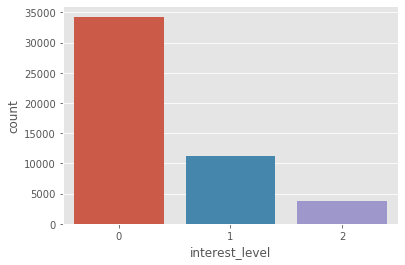

In [11]:
sns.countplot(x="interest_level", data=df)

In [12]:
df.groupby('interest_level').mean()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,year,month,day,week,hour,weekday,num_photos,num_features
interest_level,,,,,,,,,,,,,,
0,1.238741,1.514759,40.739504,7.026373e+06,-73.951667,4176.599142,2016.0,5.018697,15.384465,19.623498,4.331029,2.930930,5.524647,5.307957
1,1.163906,1.622050,40.745567,7.019098e+06,-73.965033,3158.767388,2016.0,5.003117,14.959480,19.499866,5.514382,2.893401,5.813251,5.888681
2,1.116176,1.546496,40.748007,7.017844e+06,-73.964613,2700.293045,2016.0,5.014848,14.344621,19.458453,6.444647,2.927585,5.738474,5.158635


In [13]:
pd.crosstab(df['bathrooms'], df['interest_level'], normalize='index')

interest_level,0,1,2
bathrooms,,,
0.0,0.977636,0.019169,0.003195
1.0,0.674268,0.239156,0.086576
1.5,0.937984,0.062016,0.000000
2.0,0.726632,0.220235,0.053133
2.5,0.989170,0.010830,0.000000
3.0,0.900671,0.080537,0.018792
3.5,1.000000,0.000000,0.000000
4.0,0.943396,0.031447,0.025157
4.5,1.000000,0.000000,0.000000


In [14]:
pd.crosstab(df['num_features'], df['interest_level'], normalize='index')

interest_level,0,1,2
num_features,,,
0,0.651958,0.227470,0.120572
1,0.712903,0.202535,0.084562
2,0.698663,0.210207,0.091130
3,0.736435,0.189019,0.074545
4,0.730170,0.198571,0.071258
5,0.726413,0.206950,0.066637
6,0.691525,0.234159,0.074316
7,0.691464,0.247481,0.061055
8,0.668310,0.264789,0.066901


## 방당 가격 추가
## 별로 의미는 없는 듯함
## 로그를 취할 경우 price를 포함한 3개의 히스토그램이 같은 모양

In [15]:
df['each_bed_price'] = df['price'] / (df['bedrooms'] + 1)
df['each_bed_price']

4         1200.000000
6         1266.666667
9         1165.000000
10         750.000000
15        2795.000000
             ...     
124000     700.000000
124002     798.333333
124004     925.000000
124008    1398.333333
124009    1070.000000
Name: each_bed_price, Length: 49352, dtype: float64

In [16]:
df['each_bath_price'] = df['price'] / (df['bathrooms'] + 1)
df['each_bath_price']

4         1200.0
6         1900.0
9         1747.5
10        1200.0
15        1397.5
           ...  
124000    1400.0
124002    1197.5
124004     925.0
124008    2097.5
124009    2140.0
Name: each_bath_price, Length: 49352, dtype: float64

## price 표준화

In [17]:
df['price'] = (df['price'] - df['price'].mean())/df['price'].std()
df['each_bed_price'] = (df['each_bed_price'] - df['each_bed_price'].mean())/df['each_bed_price'].std()
df['each_bath_price'] = (df['each_bath_price'] - df['each_bath_price'].mean())/df['each_bath_price'].std()

In [18]:
df['price'] = np.log(df['price']-df['price'].min()+1e-6)
df['each_bed_price'] = np.log(df['each_bed_price']-df['each_bed_price'].min()+1e-6)
df['each_bath_price'] = np.log(df['each_bath_price']-df['each_bath_price'].min()+1e-6)

In [19]:
df['price'].min()

-13.815510557964274

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        6.9590e+03, 4.2033e+04, 3.5100e+02, 3.0000e+00, 4.0000e+00]),
 array([-13.81551056, -11.90240738,  -9.98930421,  -8.07620103,
         -6.16309785,  -4.24999468,  -2.3368915 ,  -0.42378832,
          1.48931485,   3.40241803,   5.31552121]),
 <a list of 10 Patch objects>)

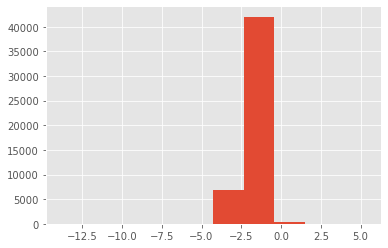

In [20]:
plt.hist(df['price'])

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        3.3960e+03, 4.5752e+04, 1.9400e+02, 4.0000e+00, 4.0000e+00]),
 array([-13.81551056, -11.90850563, -10.00150071,  -8.09449579,
         -6.18749086,  -4.28048594,  -2.37348102,  -0.46647609,
          1.44052883,   3.34753375,   5.25453868]),
 <a list of 10 Patch objects>)

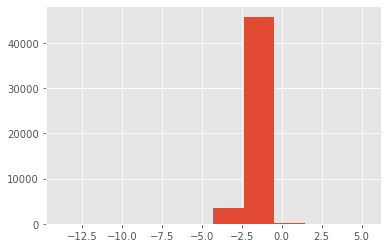

In [21]:
plt.hist(df['each_bed_price'])

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        7.4910e+03, 4.1805e+04, 4.7000e+01, 3.0000e+00, 4.0000e+00]),
 array([-13.81551056, -11.90214726,  -9.98878395,  -8.07542065,
         -6.16205735,  -4.24869405,  -2.33533074,  -0.42196744,
          1.49139586,   3.40475916,   5.31812247]),
 <a list of 10 Patch objects>)

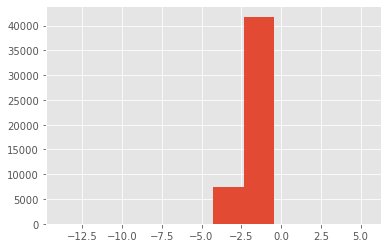

In [22]:
plt.hist(df['each_bath_price'])

## 위도 경도 표준화

In [23]:
df['latitude'] = (df['latitude'] - df['latitude'].mean())/df['latitude'].std()
df['longitude'] = (df['longitude'] - df['longitude'].mean())/df['longitude'].std()

In [24]:
df['display_address'].value_counts().describe()

count    8826.000000
mean        5.591661
std        18.302910
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       438.000000
Name: display_address, dtype: float64

## 주소 빈도수에 따른 처리

In [25]:
df['display_address']

4          145 Borinquen Place
6                    East 44th
9             East 56th Street
10         Metropolitan Avenue
15            East 34th Street
                  ...         
124000            W 171 Street
124002                Broadway
124004    210 Brighton 15th St
124008        West 21st Street
124009               E 54th St
Name: display_address, Length: 49352, dtype: object

In [26]:
keys = df['display_address'].value_counts()
for idx, k in enumerate(keys.keys()):
    if keys.loc[k] <= df['display_address'].value_counts().quantile(0.95):
        df.loc[ df['display_address'] == k, 'kkk' ] = 1e-6
    else:
        df.loc[ df['display_address'] == k , 'kkk'] =  idx+1

In [27]:
df['kkk'] = np.log(df['kkk'])

(array([21271.,     0.,     0.,     0.,     0.,     0.,   438.,  2066.,
         7616., 17961.]),
 array([-13.81551056, -11.82758098,  -9.8396514 ,  -7.85172183,
         -5.86379225,  -3.87586267,  -1.8879331 ,   0.09999648,
          2.08792606,   4.07585563,   6.06378521]),
 <a list of 10 Patch objects>)

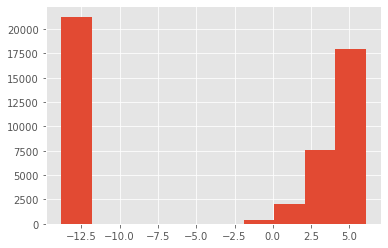

In [28]:
plt.hist(df['kkk'])

## 학습할 부분만 가져오기

In [29]:
y = df['interest_level']
y = np.array(y, dtype="float32")
y = y.reshape(-1, 1)
y

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]], dtype=float32)

In [30]:
enc = preprocessing.OneHotEncoder()
enc.fit(y)
y_onehot = enc.transform(y).toarray()
y_onehot

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [31]:
features_to_use = ['bathrooms',	'bedrooms', 'latitude', 'longitude',
                   'price','day', 'week', 'hour', 'weekday', 'num_photos', 'num_features', 'kkk']
features_to_use

['bathrooms',
 'bedrooms',
 'latitude',
 'longitude',
 'price',
 'day',
 'week',
 'hour',
 'weekday',
 'num_photos',
 'num_features',
 'kkk']

In [32]:
X = df[features_to_use]
X

,bathrooms,bedrooms,latitude,longitude,price,day,week,hour,weekday,num_photos,num_features,kkk
4,1.0,1,-0.048149,0.001541,-2.236678,16,24,5,3,12,7,-13.815511
6,1.0,2,0.015277,-0.013995,-1.770451,1,22,5,2,6,6,-13.815511
9,1.0,2,0.024987,-0.005760,-1.855117,14,24,15,1,6,6,4.110874
10,1.5,3,-0.042354,0.011219,-2.009894,24,25,7,4,5,0,-13.815511
15,1.0,0,0.003688,-0.015777,-2.081741,28,26,3,1,4,4,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,0.159357,0.013681,-2.079926,5,14,3,1,5,3,-13.815511
124002,1.0,2,0.122554,-0.001770,-2.238802,2,13,2,5,5,7,0.000000
124004,1.0,1,-0.258474,0.000268,-2.502397,26,17,5,1,3,11,-13.815511
124008,1.0,2,0.005098,-0.039039,-1.670482,19,16,2,1,5,5,4.700480


In [33]:
X = np.array(X, dtype="float32")
X

array([[ 1.0000000e+00,  1.0000000e+00, -4.8148975e-02, ...,
         1.2000000e+01,  7.0000000e+00, -1.3815511e+01],
       [ 1.0000000e+00,  2.0000000e+00,  1.5277427e-02, ...,
         6.0000000e+00,  6.0000000e+00, -1.3815511e+01],
       [ 1.0000000e+00,  2.0000000e+00,  2.4987148e-02, ...,
         6.0000000e+00,  6.0000000e+00,  4.1108737e+00],
       ...,
       [ 1.0000000e+00,  1.0000000e+00, -2.5847405e-01, ...,
         3.0000000e+00,  1.1000000e+01, -1.3815511e+01],
       [ 1.0000000e+00,  2.0000000e+00,  5.0978810e-03, ...,
         5.0000000e+00,  5.0000000e+00,  4.7004805e+00],
       [ 1.0000000e+00,  3.0000000e+00,  2.7962707e-02, ...,
         8.0000000e+00,  6.0000000e+00, -1.3815511e+01]], dtype=float32)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state = 1234)
y_train=np.array (y_train,dtype="float32")
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## 딥러닝 학습

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing

In [36]:
model = Sequential()

model.add(Dense(200, input_dim=X.shape[1] , activation="relu"))

model.add(Dense(100,  activation="relu"))

model.add(Dense(3,  activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2600      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 23,003
Trainable params: 23,003
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0002), metrics=['acc'])
model.fit(X_train, y_train, epochs=400)

Epoch 1/400
39481/39481 [==============================] - 2s 47us/step - loss: 0.6554 - acc: 0.7071
Epoch 2/400
39481/39481 [==============================] - 1s 37us/step - loss: 0.6530 - acc: 0.7102
Epoch 3/400
39481/39481 [==============================] - 2s 41us/step - loss: 0.6536 - acc: 0.7085
Epoch 4/400
39481/39481 [==============================] - 2s 46us/step - loss: 0.6529 - acc: 0.7095
Epoch 5/400
39481/39481 [==============================] - 2s 44us/step - loss: 0.6532 - acc: 0.7080
Epoch 6/400
39481/39481 [==============================] - 2s 48us/step - loss: 0.6489 - acc: 0.7108
Epoch 7/400
39481/39481 [==============================] - 2s 52us/step - loss: 0.6499 - acc: 0.7100
Epoch 8/400
39481/39481 [==============================] - 2s 56us/step - loss: 0.6479 - acc: 0.7095
Epoch 9/400
39481/39481 [==============================] - 2s 55us/step - loss: 0.6480 - acc: 0.7117
Epoch 10/400
39481/39481 [==============================] - 2s 58us/step - loss: 0.6459 - a

39481/39481 [==============================] - 2s 46us/step - loss: 0.6050 - acc: 0.7294
Epoch 82/400
39481/39481 [==============================] - 2s 46us/step - loss: 0.6040 - acc: 0.7307
Epoch 83/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.6030 - acc: 0.7318
Epoch 84/400
39481/39481 [==============================] - 2s 44us/step - loss: 0.6039 - acc: 0.7293
Epoch 85/400
39481/39481 [==============================] - 2s 47us/step - loss: 0.6022 - acc: 0.7302
Epoch 86/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.6029 - acc: 0.7302
Epoch 87/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.6012 - acc: 0.7319
Epoch 88/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.6009 - acc: 0.7292
Epoch 89/400
39481/39481 [==============================] - 2s 46us/step - loss: 0.6004 - acc: 0.7322
Epoch 90/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.6001 - acc: 

39481/39481 [==============================] - 2s 46us/step - loss: 0.5656 - acc: 0.7489
Epoch 161/400
39481/39481 [==============================] - 2s 46us/step - loss: 0.5637 - acc: 0.7505
Epoch 162/400
39481/39481 [==============================] - 2s 48us/step - loss: 0.5626 - acc: 0.7496
Epoch 163/400
39481/39481 [==============================] - 2s 51us/step - loss: 0.5631 - acc: 0.7509
Epoch 164/400
39481/39481 [==============================] - 2s 47us/step - loss: 0.5615 - acc: 0.7511
Epoch 165/400
39481/39481 [==============================] - 2s 51us/step - loss: 0.5623 - acc: 0.7500
Epoch 166/400
39481/39481 [==============================] - 2s 49us/step - loss: 0.5617 - acc: 0.7485
Epoch 167/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.5612 - acc: 0.7519
Epoch 168/400
39481/39481 [==============================] - 2s 44us/step - loss: 0.5601 - acc: 0.7522
Epoch 169/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.559

39481/39481 [==============================] - 2s 44us/step - loss: 0.5299 - acc: 0.7665
Epoch 240/400
39481/39481 [==============================] - 2s 46us/step - loss: 0.5308 - acc: 0.7634
Epoch 241/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.5295 - acc: 0.7673
Epoch 242/400
39481/39481 [==============================] - 2s 47us/step - loss: 0.5294 - acc: 0.7670
Epoch 243/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.5276 - acc: 0.7666
Epoch 244/400
39481/39481 [==============================] - 2s 44us/step - loss: 0.5283 - acc: 0.7659
Epoch 245/400
39481/39481 [==============================] - 2s 46us/step - loss: 0.5277 - acc: 0.7682
Epoch 246/400
39481/39481 [==============================] - 2s 44us/step - loss: 0.5282 - acc: 0.7660
Epoch 247/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.5280 - acc: 0.7669
Epoch 248/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.526

39481/39481 [==============================] - 2s 44us/step - loss: 0.5014 - acc: 0.7807
Epoch 319/400
39481/39481 [==============================] - 2s 47us/step - loss: 0.5010 - acc: 0.7785
Epoch 320/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.4997 - acc: 0.7799
Epoch 321/400
39481/39481 [==============================] - 2s 44us/step - loss: 0.5010 - acc: 0.7789
Epoch 322/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.5004 - acc: 0.7803
Epoch 323/400
39481/39481 [==============================] - 2s 46us/step - loss: 0.4997 - acc: 0.7816
Epoch 324/400
39481/39481 [==============================] - 2s 45us/step - loss: 0.4992 - acc: 0.7791
Epoch 325/400
39481/39481 [==============================] - 2s 46us/step - loss: 0.4993 - acc: 0.7814
Epoch 326/400
39481/39481 [==============================] - 2s 47us/step - loss: 0.4979 - acc: 0.7813
Epoch 327/400
39481/39481 [==============================] - 2s 53us/step - loss: 0.497

39481/39481 [==============================] - 2s 48us/step - loss: 0.4777 - acc: 0.7923
Epoch 398/400
39481/39481 [==============================] - 2s 44us/step - loss: 0.4780 - acc: 0.7911
Epoch 399/400
39481/39481 [==============================] - 2s 50us/step - loss: 0.4771 - acc: 0.7927
Epoch 400/400
39481/39481 [==============================] - 2s 51us/step - loss: 0.4764 - acc: 0.7930


## 테스트셋 확인

In [39]:
df_test

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124003,1.0,1,bd863d28a6b119ac3bc72d5f27b07f24,2016-04-26 16:09:55,BRAND NEW TO MARKET 1BDR \r107TH AND LEXINGTON...,150 EAST 107TH STREET,[],40.7925,6928108,-73.9454,453d46f8113e1f2c730c2ee5a4469c71,[https://photos.renthop.com/2/6928108_231eb983...,1700,158 EAST 107TH STREET
124005,1.0,2,9174b75c0cd978eb0e5aa93afbad754b,2016-04-21 05:06:19,Convertible 2BR apartment features a brand new...,E 33rd St.,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7456,6906674,-73.9797,2983e45f7e0ad87d677dacd13e362785,[https://photos.renthop.com/2/6906674_9fe899a8...,4195,141 E 33rd St.
124006,1.0,0,0,2016-04-20 01:31:52,"Let's get you in to see this $2,400/mo, recent...",Lexington Avenue,"[Dogs Allowed, Cats Allowed]",40.7416,6897967,-73.9829,e6472c7237327dd3903b3d6f6a94515a,[],2400,95 Lexington Avenue
124007,2.0,2,c90c010e5505365676538e64d02aa1e0,2016-04-08 02:26:45,CooperCooper.com :: Web ID #171357; Access 100...,Park Avenue,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]",40.7485,6842183,-73.9800,6e5c10246156ae5bdcd9b487ca99d96a,[https://photos.renthop.com/2/6842183_b1fe51f4...,6895,41 Park Avenue
